## [쇼핑몰 지점별 매출액 예측 경진대회](https://dacon.io/competitions/official/235942/overview/description)


In [31]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

data_path = '../data/shopping_mall_sales_revenue'

# train 데이터 불러오기
train = pd.read_csv(f'{data_path}/train.csv')

# test 데이터 불러오기
test = pd.read_csv(f'{data_path}/test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv(f'{data_path}/sample_submission.csv')

In [32]:
train
# 6255 rows × 13 columns

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [33]:
# 데이터 결측치 및 변수들의 타입 확인
train.info()
# promotion 부분에 결측치가 있다는 것을 알 수 있습니다.

# date, isholiday 부분은 숫자가 아니기 때문에 분석 전에 데이터 전처리가 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


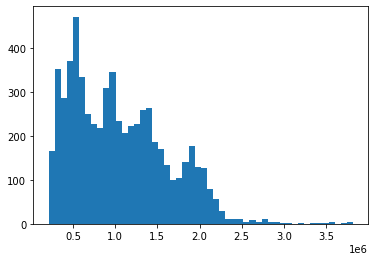

In [34]:
import matplotlib.pyplot as plt

# 이번엔 예측하고자 하는 값인 Weekly_Sales를 확인해봅니다.
plt.hist(train.Weekly_Sales, bins=50)
plt.show()

----

In [35]:
## 결측치 처리

# pandas의 fillna(0) 메소드를 활용합니다.
train = train.fillna(0)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [36]:
# Date 칼럼에서 "월"에 해당하는 정보만 추출하여 숫자 형태로 반환하는 함수를 작성합니다.
def get_month(date):
    month = date[3:5]
    month = int(month)
    return month

# 이 함수를 Date 칼럼에 적용한 Month 칼럼을 만들어줍니다.
train['Month'] = train['Date'].apply(get_month)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9


In [37]:
# IsHoliday 칼럼의 값을 숫자 형태로 반환하는 함수를 작성합니다.
def holiday_to_number(isholiday):
    if isholiday == True:
        number = 1
    else:
        number = 0
    return number

# 이 함수를 IsHoliday 칼럼에 적용한 NumberHoliday 칼럼을 만들어줍니다.
train['NumberHoliday'] = train['IsHoliday'].apply(holiday_to_number)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,NumberHoliday
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,0
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,1
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,0
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,0
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,0
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,1
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,0
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,0


In [38]:
## test 에도 적용

# 결측치 처리
test = test.fillna(0)

# Date 전처리
test['Month'] = test['Date'].apply(get_month)

# IsHoliday 전처리
test['NumberHoliday'] = test['IsHoliday'].apply(holiday_to_number)

In [39]:
# 분석할 의미가 없는 칼럼을 제거합니다.
# train = train.drop(columns=['id'])
# test = test.drop(columns=['id'])

# 전처리 하기 전 칼럼들을 제거합니다.
train = train.drop(columns=['Date','IsHoliday'])
test = test.drop(columns=['Date','IsHoliday'])

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x_train = train.drop(columns=['Weekly_Sales'])
y_train = train[['Weekly_Sales']]

# test 에는 Weekly_Sales 컬럼 없음

----

In [40]:
from sklearn.linear_model import LinearRegression

# 모델 선언
model = LinearRegression()

In [41]:
# 모델 학습
model.fit(x_train,y_train)

LinearRegression()

In [42]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
pred = model.predict(x_train)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(pred[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[[1308049.75341311]
 [1285645.33210074]
 [1286521.18362351]
 [1282817.34237861]
 [1321154.00134095]
 [1308033.45649066]
 [1323342.90652646]
 [1327245.04831265]
 [1331090.39341535]
 [1333935.17066852]]


In [43]:
pred_test = model.predict(test)

----

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
# print("Coefficients: \n", model.coef_)

# RMSE
mse = mean_squared_error(y_train, pred)
rmse = mse**.5

# The mean squared error
print("Root Mean Squared Error: %.2f" % rmse )
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, pred))

Root Mean Squared Error: 505674.08
Coefficient of determination: 0.20


In [45]:
print(x_train.shape, y_train.shape)
print(pred.shape)

(6255, 12) (6255, 1)
(6255, 1)


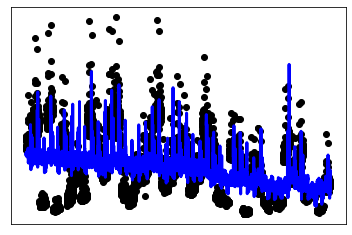

In [46]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(x_train['id'], y_train, color="black")
plt.plot(x_train['id'], pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

----

In [47]:
# 예측된 값을 정답파일과 병합
sample_submission['Weekly_Sales'] = pred_test

# 정답파일 데이터프레임 확인
sample_submission.head()

,id,Weekly_Sales
0,1,2.003754e+06
1,2,1.947512e+06
2,3,1.835278e+06
3,4,1.810908e+06
4,5,2.620454e+06


In [48]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv(f'{data_path}/submission.csv',index = False)